<a href="https://colab.research.google.com/github/myredex/tensorflow_tutorials/blob/master/03_tensorflow_multi_class_classification_simple_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class classification using Tensorflow

### Get data for multi-class classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Load data and create train and test datasets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

### Explore and Visualise the data

In [ ]:
# How our data looks like
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
# What is the shape of the data
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# SHape of first row 
X_train[0].shape, y_train[0].shape

((28, 28), ())

In [ ]:
# What is the maximum value of the datasets
X_train.max(), X_test.max()

(255, 255)

In [ ]:
# Create a small list with labels to read
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sadal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Dress')

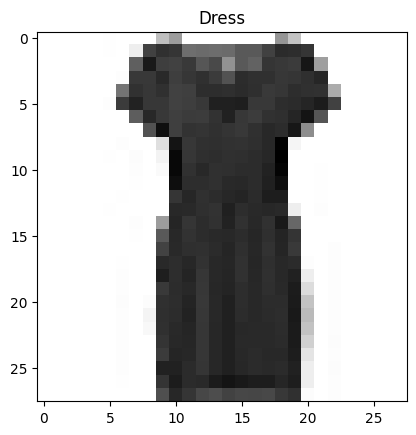

In [ ]:
# Visualize image
import matplotlib.pyplot as plt

image_index = 20

plt.imshow(X_train[image_index], cmap=plt.cm.binary)
plt.title(class_names[y_train[image_index]])

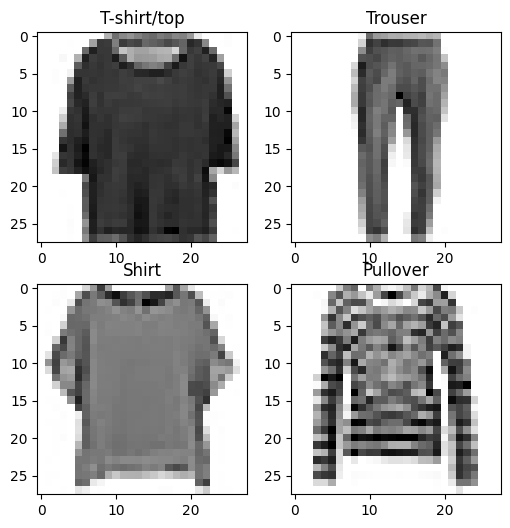

In [ ]:
# Plot multiple random images
import random

plt.figure(figsize=(6,6))

for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  image_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[image_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[image_index]])

### Create classification model with Tensorflow

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1./255),        # Performs normalisation
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flattens inputs
    tf.keras.layers.Dense(100, activation="relu"),  # Working layer
    tf.keras.layers.Dense(50, activation="relu"),   # Working layer
    tf.keras.layers.Dense(10, activation="softmax") # Final classification layer
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=40,
                    validation_data=(X_test, y_test))

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5295 - accuracy: 0.8115 - val_loss: 0.5145 - val_accuracy: 0.8144
Epoch 2/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4373 - accuracy: 0.8436 - val_loss: 0.4854 - val_accuracy: 0.8266
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4142 - accuracy: 0.8504 - val_loss: 0.4711 - val_accuracy: 0.8358
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4043 - accuracy: 0.8563 - val_loss: 0.4491 - val_accuracy: 0.8370
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3903 - accuracy: 0.8598 - val_loss: 0.4352 - val_accuracy: 0.8488
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3832 - accuracy: 0.8615 - val_loss: 0.4419 - val_accuracy: 0.8452
Epoch 7/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3776 - accuracy: 0.8634 - val_loss: 0.4255 - val_accuracy:

### Evaluate model

In [ ]:
# Predict test data
y_pred = model.predict(X_test)

y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.0755342e-37,
       0.0000000e+00, 1.6756933e-02, 3.1900439e-27, 1.9426727e-01,
       1.2748217e-11, 7.8897578e-01], dtype=float32)

In [ ]:
# To make confusion matrix we have to have int values for predictions
y_pred[0].argmax()

9

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred.argmax(axis=1))

In [ ]:
cm

array([[894,   0,  11,  26,   2,   2,  56,   0,   9,   0],
       [  4, 960,   2,  23,   3,   1,   5,   0,   2,   0],
       [ 17,   2, 808,  11,  85,   2,  72,   0,   3,   0],
       [ 49,   5,   5, 863,  45,   6,  22,   0,   5,   0],
       [  0,   0, 183,  23, 734,   4,  52,   0,   4,   0],
       [  0,   0,   0,   0,   0, 952,   2,  32,   4,  10],
       [231,   0, 126,  28,  79,   3, 515,   0,  18,   0],
       [  0,   0,   0,   0,   0,  23,   0, 965,   0,  12],
       [  0,   0,   2,   4,   3,   3,  10,   7, 970,   1],
       [  0,   0,   0,   0,   0,  15,   0,  91,   1, 893]])

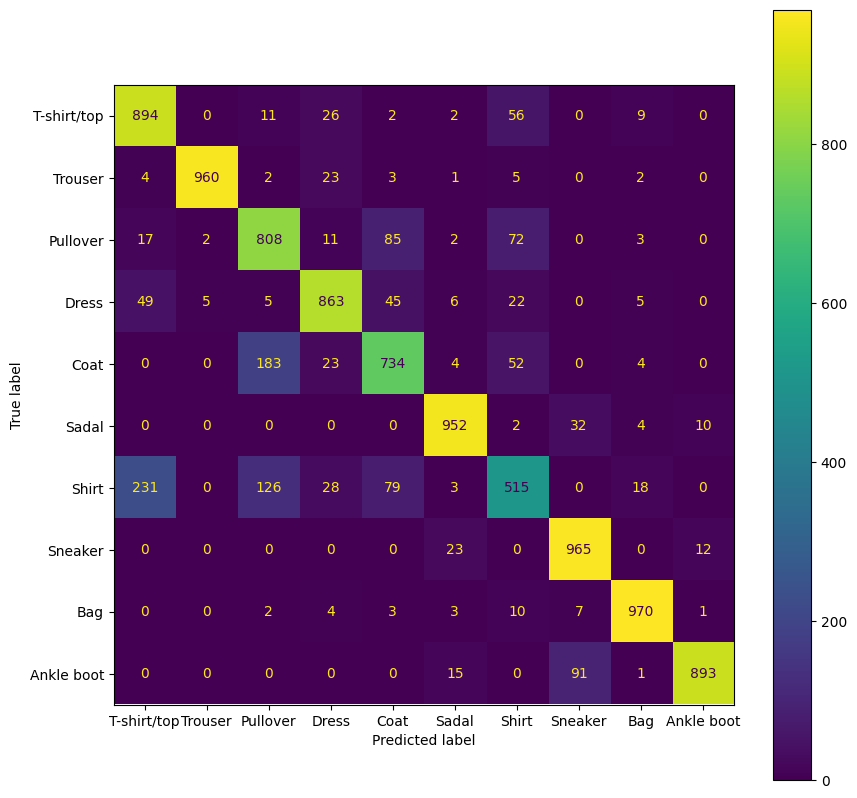

In [ ]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()